<a href="https://colab.research.google.com/github/wisesprout/algorithm-practice/blob/main/programmers_exhaustive_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 1 모의고사

### my solution

### zip으로 학생 정답/문제 정답 묶어서 비교 + 기본적인 최대값 구하기 *해결방법*

In [ ]:
def solution(answers):
    answers = answers
    students = [[1,2,3,4,5],[2,1,2,3,2,4,2,5],[3,3,1,1,2,2,4,4,5,5]]
    total=[]
    for s in students:  #[1,2,3,4,5]
        #print('학생:',s)
        student_a = s*(len(answers)//len(s)+1)  # 답보다 긴 리스트로 만들기
        student_a = student_a[:len(answers)]  # 답 길이와 일치하는 학생의 답안
        print('학생답안:',student_a)
        count = 0
        for a, s_a in zip(answers,student_a):
            if a == s_a:
                count += 1
        
        total.append(count)

    # 제일 많이 맞힌 학생의 인덱스+1
    max = 0
    answer=[]
    print(total)
    for i in range(3):
        print('i:',i)
        if total[i] >= max:
            print(total[i],'와',max,'비교')
            max = total[i]
            print('새로운 max:',max)
            answer.append(i+1)
            print('answer:',answer)

    return answer

In [ ]:
solution([1,2,3,4,5])  # [1]

학생답안: [1, 2, 3, 4, 5]
학생답안: [2, 1, 2, 3, 2]
학생답안: [3, 3, 1, 1, 2]
[5, 0, 0]
i: 0
5 와 0 비교
새로운 max: 5
answer: [1]
i: 1
i: 2


[1]

In [ ]:
solution([1,3,2,4,2])  # [1,2,3]

학생답안: [1, 2, 3, 4, 5]
학생답안: [2, 1, 2, 3, 2]
학생답안: [3, 3, 1, 1, 2]
[2, 2, 2]
i: 0
2 와 0 비교
새로운 max: 2
answer: [1]
i: 1
2 와 2 비교
새로운 max: 2
answer: [1, 2]
i: 2
2 와 2 비교
새로운 max: 2
answer: [1, 2, 3]


[1, 2, 3]

In [ ]:
solution([1,2,3,4,5,6,7,8,9,10])

학생답안: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
학생답안: [2, 1, 2, 3, 2, 4, 2, 5, 2, 1]
학생답안: [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]
[5, 0, 0]
i: 0
5 와 0 비교
새로운 max: 5
answer: [1]
i: 1
i: 2


[1]

### [정답] n번째 정답과 n/5의 나머지번째 학생 정답과 비교 + 간단한 최대값 구하기

In [ ]:
def solution(answers):
    answers = answers
    students = [[1,2,3,4,5],[2,1,2,3,2,4,2,5],[3,3,1,1,2,2,4,4,5,5]]
    total = []  # 학생별 맞힌 문제 수

    # 채점
    for s in students: # s번째 학생의 정답
        count = 0  # 채점 전 맞힌 답 수
        for i,a in enumerate(answers):  # a번째 문제의 답
            if a == s[i%len(s)]:
                count += 1
        total.append(count)  # 채점 후 맞힌 답 수 추가

    max_answer = max(total)  # 제일 많이 맞힌 정답 수
    # 학생들의 정답 수와 최대 정답 수 비교, 일치하면 answer 리스트에 추가
    answer = [i+1 for i in range(3) if total[i]==max_answer]  
    return answer

In [ ]:
solution([1,2,3,4,5])  # [1]

[1]

In [ ]:
solution([1,3,2,4,2])  # [1,2,3]

[1, 2, 3]

### reference code

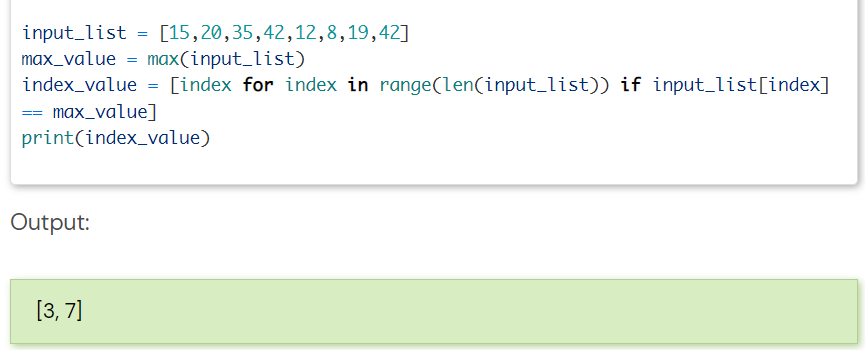

In [ ]:
def solution(answers):
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0]
    result = []

    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1

    for idx, s in enumerate(score):
        if s == max(score):
            result.append(idx+1)

    return result

# Level 2 소수 찾기

### my solution

In [ ]:
from itertools import permutations
def solution(numbers):
    a = set()
    for i in range(len(numbers)):
        a |= set(map(int, map("".join, permutations(list(numbers), i + 1))))
    a -= set(range(0, 2))
    for i in range(2, int(max(a) ** 0.5) + 1):
        a -= set(range(i * 2, max(a) + 1, i))
    return len(a)